<h1>RYLAN NATHAN LEWIS</h1>
<h1>Rylannat</h1>
<h1>USC ID: 8358-1308-73</h1>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, DistanceMetric
from collections import Counter


Get the Vertebral Column Data Set

Since the assignment is focusing only on a binary classification task between "Normal" and "Abnormal", I have chosen to work with the column_2C.dat file as it only holds the data corresponding to these two classes.

In [3]:
df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep=" ", header=None)

In [4]:
df

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


The .dat file does not have the column names in the header, so the below step adds the independent variables of the data as the column names. It ends with the column name "class" which acts as the dependent variable

In [5]:
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','grade_of_spondylolisthesis','class']

In [6]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


As the assignment suggests, I have mapped "NO" class to 0 and "AB" class to 1

In [7]:
df['class'] = df['class'].map({"NO": 0, "AB": 1})

In [8]:
df['class'].unique()

array([1, 0])

In [9]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### (b) Pre-Processing and Exploratory Data Analysis





#### i. Scatterplots

I have used seaborn's pairplot to make scatterplots of each pair of independent
variables, and the scatter is shown by the dependent variable class

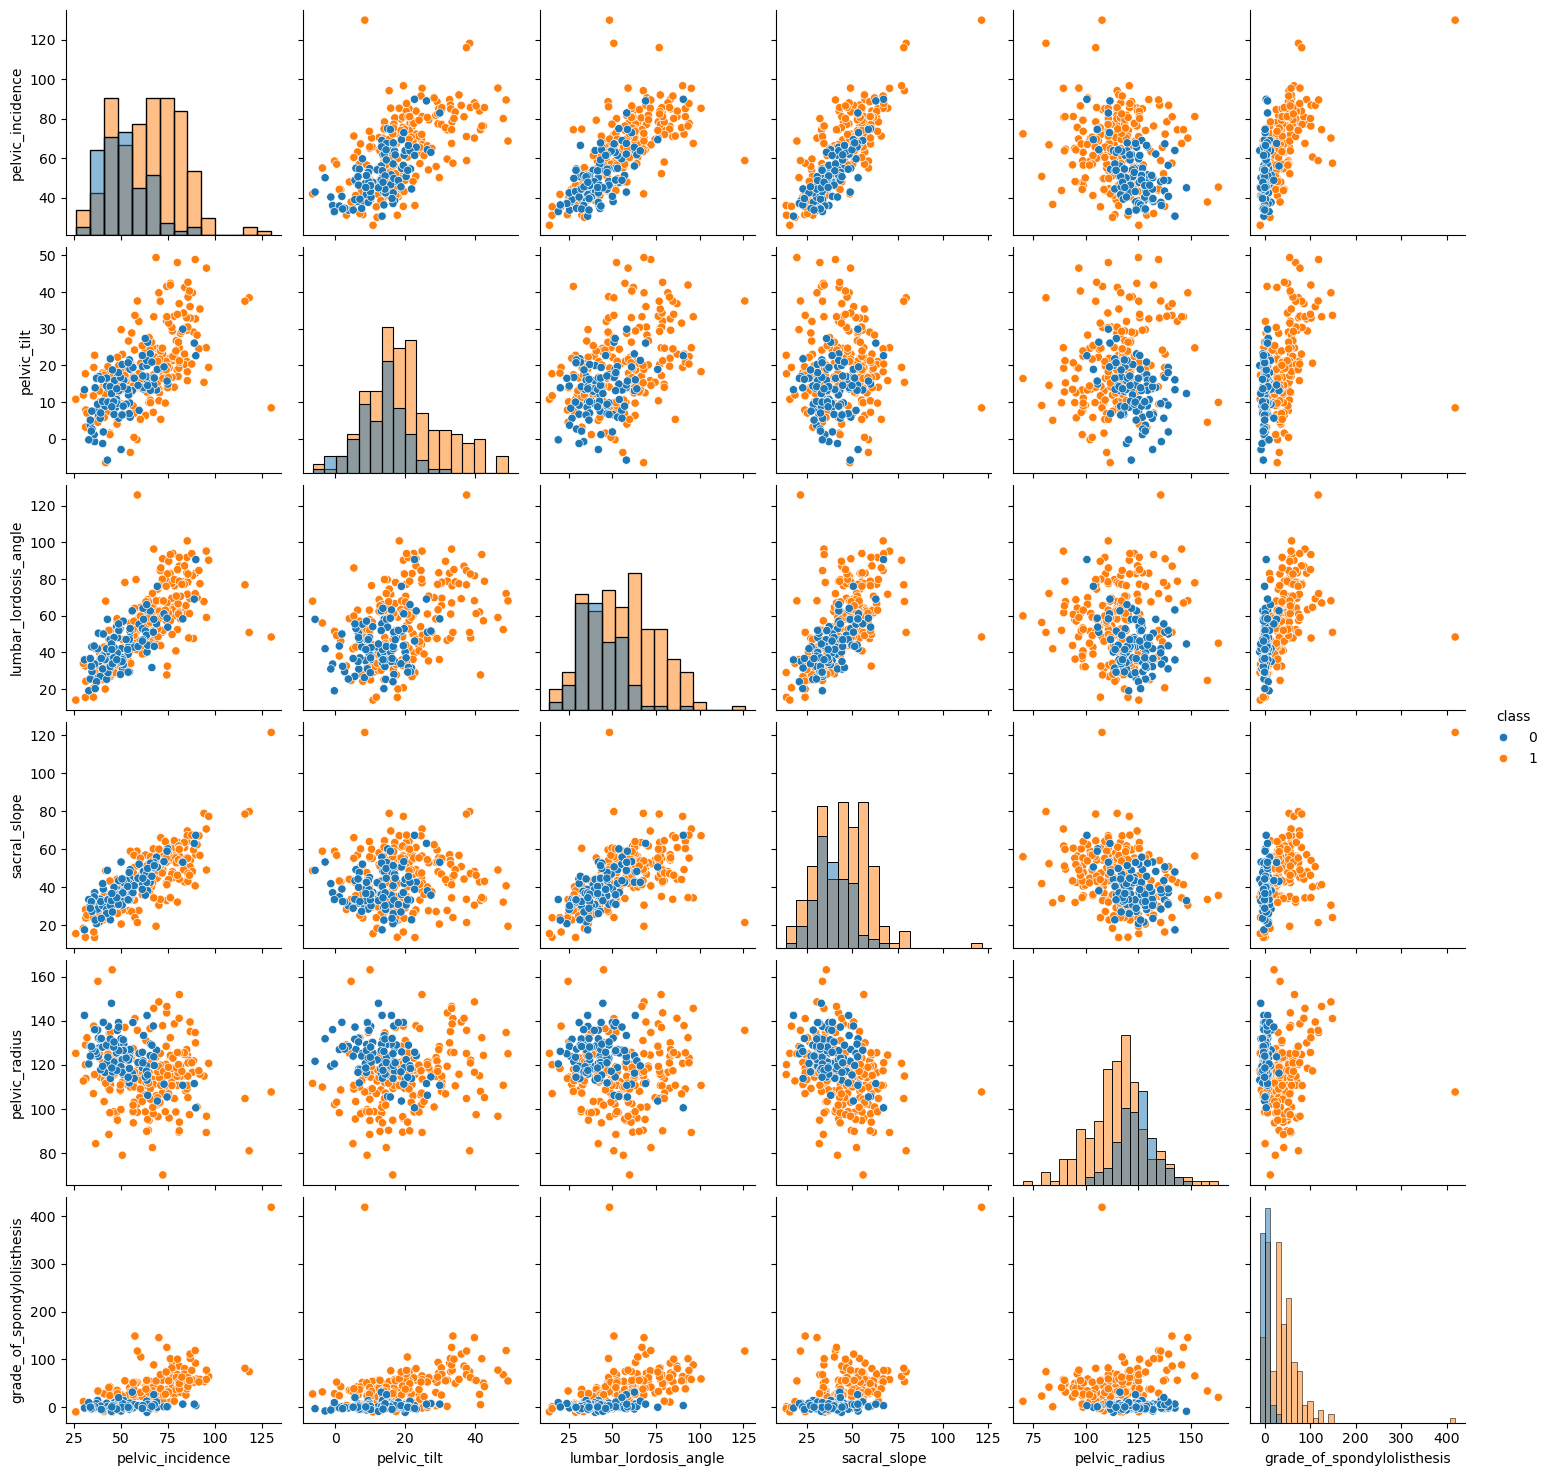

In [10]:
sns.pairplot(df, hue='class',diag_kind = 'hist')
plt.show()

#### ii. Boxplots

I have used Seaborn's boxplot to visualize each independent variable grouped by the dependent variable "class". The boxplots help me compare the distribution of features across classes by displaying the quartiles of each variable and identify whether certain variables show distinct separation or contain outliers.

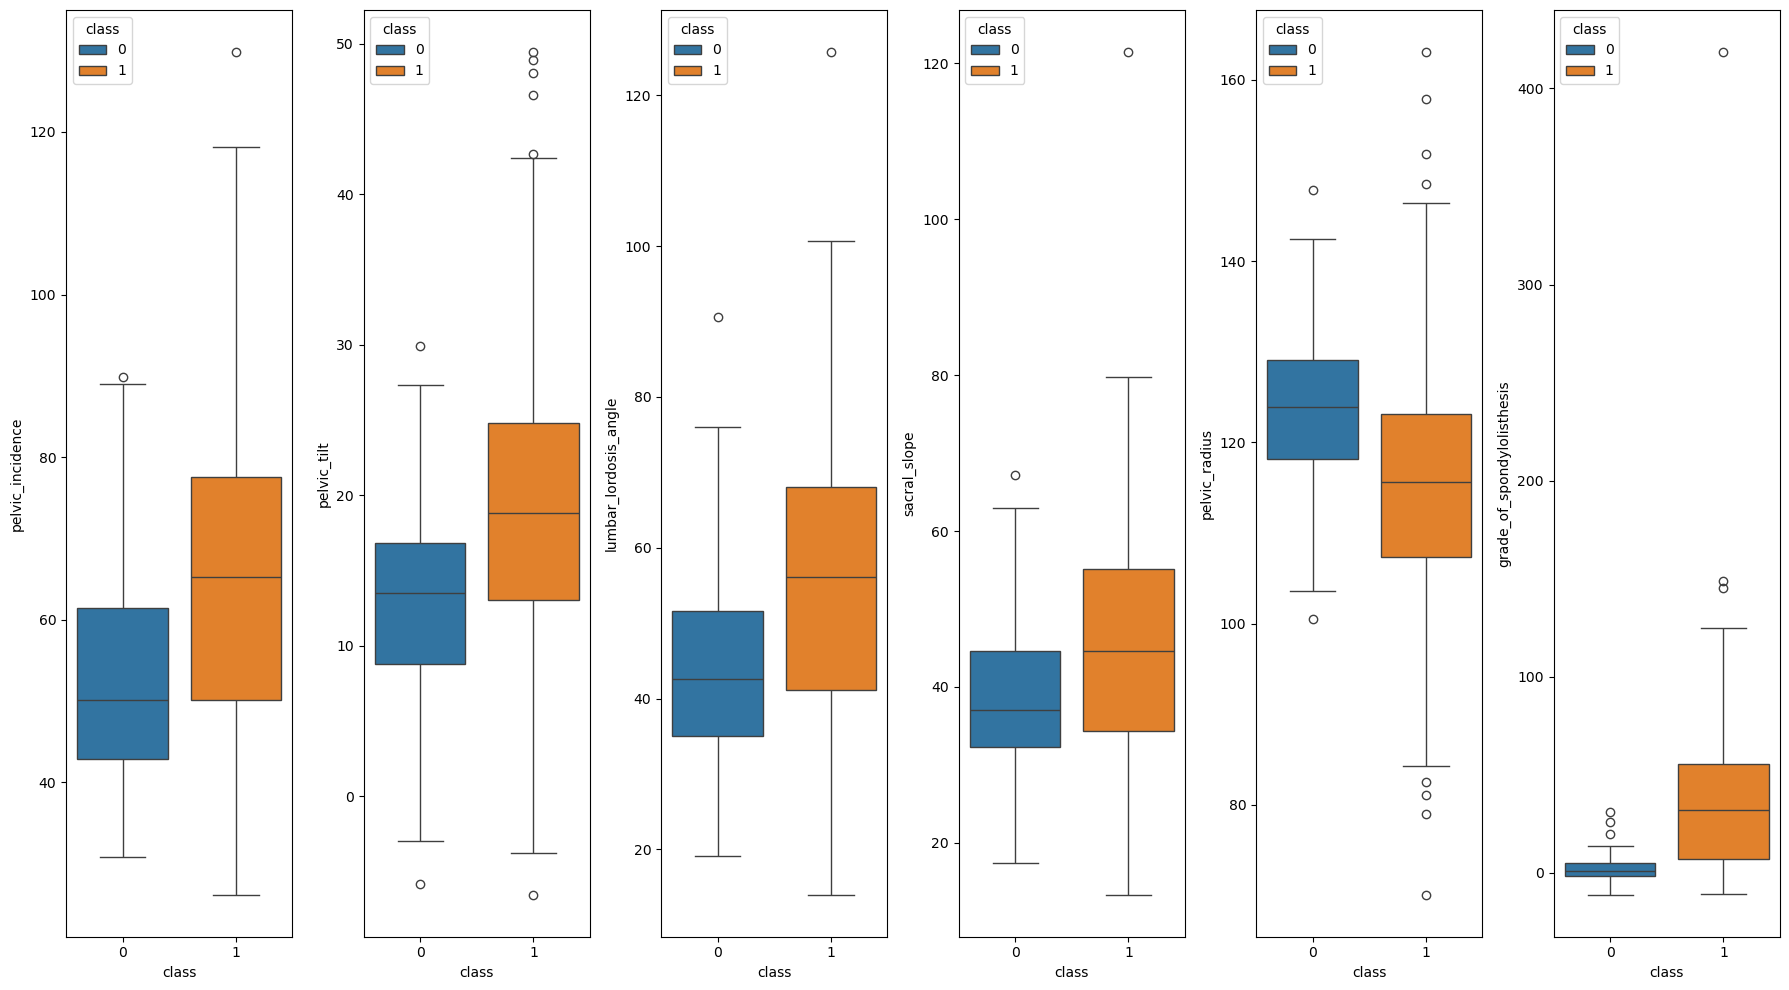

In [11]:
indep_var = df.columns.drop('class')

fig,axes = plt.subplots(1,6,figsize=(18,10))

for i,col in enumerate(indep_var):
  sns.boxplot(x='class', y=col, data=df, hue ='class',ax=axes[i])

plt.tight_layout()
plt.show()

#### iii. Split Data Set

As the assignment suggests, I have selected first 70 examples from class 0, first 140 from class 1 for the training data. For the test data, I have selected the rest of the data from class 0 after 70, and the rest of the data after 140 from class 1

In [12]:
data_0_class = df[df['class'] == 0]
data_1_class = df[df['class'] == 1]

In [13]:
train_0 = data_0_class.iloc[:70]
train_1 = data_1_class.iloc[:140]

training_set = pd.concat([train_0,train_1], axis =0).reset_index(drop=True)

In [14]:
test_0 = data_0_class.iloc[70:]
test_1 = data_1_class.iloc[140:]

test_set = pd.concat([test_0,test_1],axis = 0).reset_index(drop=True)

In [15]:
x_train = training_set.drop('class', axis=1).values
y_train = training_set['class'].values
x_test = test_set.drop('class', axis=1).values
y_test = test_set['class'].values

### (c) Classification

#### i. Euclidean Metric

This part is where I build the algorithm for the KNN model classifier using Euclidean distance. I have followed the following steps:
1.   Calculating the distance of the test point
2.   Storing the (distance,label) pair in  distances array
1.   Sorting the distances array in ascending order to identify the nearest neighbors for the later test points
2.   Performing majority voting of the labels to identify the majority class by counting the number of label occurences of the class using the Counter method
3. In case of a tie between labels, code will assign the point to class 0. Since the training set contains only 70 instances of class 0 and 140 instances of class 1 , there is a clear case of class imbalance in the training data. This rule helps to reduce bias toward class 1 by favoring class 0 because the dominance of class 1 votes could partly be due to its larger representation in the dataset.





In [16]:
def euclidean_distance(p1,p2):
  return np.sqrt(np.sum((np.array(p1)-np.array(p2))**2))

In [17]:

def knn(train_data, train_labels, test_point, k):
    distances = [(euclidean_distance(test_point, x), label)
                 for x, label in zip(train_data, train_labels)]
    distances.sort(key=lambda x: x[0])

    k_nearest_labels = [label for _, label in distances[:k]]

    counts = Counter(k_nearest_labels)
    max_count = max(counts.values())

    candidates = [label for label, count in counts.items() if count == max_count]
    return min(candidates)

In [18]:
def knn_predict_batch(x_test, x_train, y_train, k):
    return np.array([knn(x_train, y_train, x, k) for x in x_test])

In [19]:
k = 6
y_pred_train = knn_predict_batch(x_train, x_train, y_train, k)
train_accuracy = np.mean(y_pred_train == y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8523809523809524


In [20]:
y_pred_test = knn_predict_batch(x_test, x_train, y_train, k)
test_accuracy = np.mean(y_pred_test == y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.92


#### ii. Test Data

Here, I will test the model for different values of K (k ={208,205,202,....1})

In [21]:
k_tests = list(range(208,0,-3))
print(k_tests)

[208, 205, 202, 199, 196, 193, 190, 187, 184, 181, 178, 175, 172, 169, 166, 163, 160, 157, 154, 151, 148, 145, 142, 139, 136, 133, 130, 127, 124, 121, 118, 115, 112, 109, 106, 103, 100, 97, 94, 91, 88, 85, 82, 79, 76, 73, 70, 67, 64, 61, 58, 55, 52, 49, 46, 43, 40, 37, 34, 31, 28, 25, 22, 19, 16, 13, 10, 7, 4, 1]


Initializing the train_errors and test_errors lists to store the error rates for different k values to plot them in terms of k

In [22]:
train_errors=[]
test_errors=[]

In [23]:
for k in k_tests:
  y_predict_train = knn_predict_batch(x_train,x_train,y_train,k)
  new_train_accuracy = np.mean(y_predict_train == y_train)
  train_error = 1 - new_train_accuracy

  y_predict_test = knn_predict_batch(x_test,x_train,y_train,k)
  new_test_accuracy = np.mean(y_predict_test == y_test)
  test_error = 1 - new_test_accuracy

  train_errors.append(train_error)
  test_errors.append(test_error)


In [24]:
print(train_errors)
print(test_errors)

[np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.33333333333333337), np.float64(0.30952380952380953), np.float64(0.29047619047619044), np.float64(0.24761904761904763), np.float64(0.24761904761904763), np.float64(0.2142857142857143), np.float64(0.2142857142857143), np.float64(

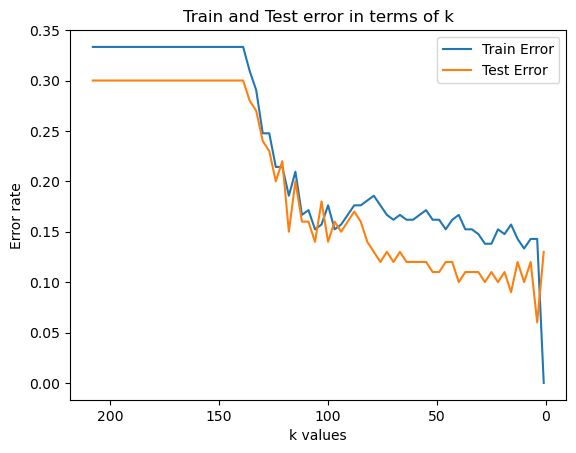

In [25]:
plt.plot(k_tests, train_errors, label="Train Error")
plt.plot(k_tests, test_errors, label="Test Error")
plt.title("Train and Test error in terms of k")
plt.xlabel("k values")
plt.ylabel("Error rate")
plt.legend()
plt.gca().invert_xaxis()
plt.show()

# Finding out best k

Here, I have first found out the minimum test error, and the corresponding indexes of this error are the possible best k values. From this new list of best possible k values, I found the minimum k value which is k*

In [26]:
for k_val, err in zip(k_tests, test_errors):
    print(k_val, err)

208 0.30000000000000004
205 0.30000000000000004
202 0.30000000000000004
199 0.30000000000000004
196 0.30000000000000004
193 0.30000000000000004
190 0.30000000000000004
187 0.30000000000000004
184 0.30000000000000004
181 0.30000000000000004
178 0.30000000000000004
175 0.30000000000000004
172 0.30000000000000004
169 0.30000000000000004
166 0.30000000000000004
163 0.30000000000000004
160 0.30000000000000004
157 0.30000000000000004
154 0.30000000000000004
151 0.30000000000000004
148 0.30000000000000004
145 0.30000000000000004
142 0.30000000000000004
139 0.30000000000000004
136 0.28
133 0.27
130 0.24
127 0.22999999999999998
124 0.19999999999999996
121 0.21999999999999997
118 0.15000000000000002
115 0.19999999999999996
112 0.16000000000000003
109 0.16000000000000003
106 0.14
103 0.18000000000000005
100 0.14
97 0.16000000000000003
94 0.15000000000000002
91 0.16000000000000003
88 0.17000000000000004
85 0.16000000000000003
82 0.14
79 0.13
76 0.12
73 0.13
70 0.12
67 0.13
64 0.12
61 0.12
58 0.12


In [27]:
min_error = min(test_errors)
best_k_possibilities = [k for k, e in zip(k_tests, test_errors) if e == min_error]
k_star = min(best_k_possibilities)
print("Best k is:", k_star)

Best k is: 4


# Training using best k


Using k_star which is 4 for retraining the KNN classifier. Then using Confusion matrix, Total positive rate, Total negative rate, Precision, F-1 score on the test data to get unbiased performance metrics of the classifier

In [28]:
y_best_train_pred = knn_predict_batch(x_train,x_train,y_train, k_star)
train_accuracy_bestk = np.mean(y_best_train_pred == y_train)
print(train_accuracy_bestk)

0.8571428571428571


In [29]:
y_best_test_pred = knn_predict_batch(x_test,x_train,y_train,k_star)
test_accuracy_bestk = np.mean(y_best_test_pred == y_test)
print(test_accuracy_bestk)

0.94


In [30]:
def confusion_matrix(y_actual, y_predicted):
  True_positive = np.sum((y_actual == 1) & (y_predicted == 1))
  True_negative = np.sum((y_actual == 0) & (y_predicted == 0))
  False_positive = np.sum((y_actual == 0) & (y_predicted == 1))
  False_negative = np.sum((y_actual == 1) & (y_predicted == 0))
  return np.array([[True_negative, False_positive],[False_negative, True_positive]])

In [31]:
matrix = confusion_matrix(y_test, y_best_test_pred)
True_negative, False_positive, False_negative, True_positive = matrix.ravel()
print(matrix)

[[25  5]
 [ 1 69]]


In [32]:
True_positive_rate = True_positive / (True_positive + False_negative)
True_negative_rate = True_negative / (True_negative + False_positive)
Precision = True_positive / (True_positive + False_positive)
F1_score = 2 * (Precision * True_positive_rate) / (Precision + True_positive_rate)

In [33]:
print("TPR: " + str(True_positive_rate))
print("TNR: " + str(True_negative_rate))
print("Precision: " + str(Precision))
print("F1-Score: " + str(F1_score))

TPR: 0.9857142857142858
TNR: 0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333333


#### iii. Learning Curve

In this part, I first created the subset training set and subset test set using the count of rows to be taken from the training set created in 1(b)(iii), which is defined by the variable N (N/3 of class 0 and N - N/3 rows of class 1). Then trained and tested each of the subset data on the set of k values to find optimal k values for that N. Plotted the best test error for each N, also known as Learning Curve

In [34]:
N = list(range(10,211,10))
best_test_error = []

In [35]:
for n in N:
  n_class_0 = n // 3
  n_class_1 = n - ( n // 3 )

  subset_0 = train_0.iloc[:n_class_0]
  subset_1 = train_1.iloc[:n_class_1]

  subset_data = pd.concat([subset_0,subset_1],axis=0)

  x_subset_train = subset_data.drop('class', axis=1).values
  y_subset_train = subset_data['class'].values

  subset_test_errors = []

  k_subset_values = list(range(1,n+1,5))

  for k in k_subset_values:
    y_subset_pred = knn_predict_batch(x_test,x_subset_train,y_subset_train,k)
    test_subset_accuracy = np.mean(y_subset_pred == y_test)
    test_subset_error = 1 - test_subset_accuracy
    subset_test_errors.append(test_subset_error)

  best_test_error.append(min(subset_test_errors))

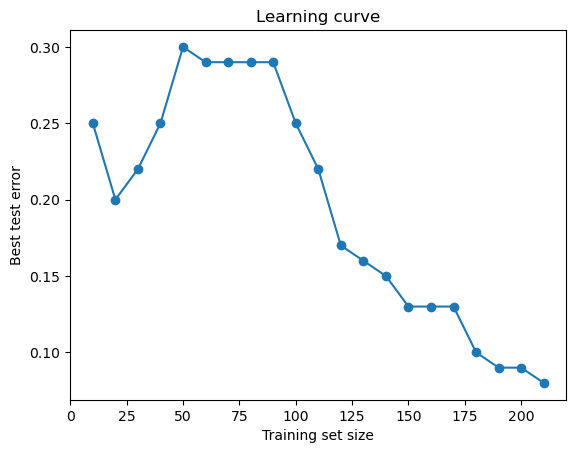

In [36]:
plt.plot(N, best_test_error, marker='o')
plt.xlabel("Training set size")
plt.ylabel("Best test error")
plt.title("Learning curve")
plt.show()

### (d) Other Metrics

In this section, I have replaced euclidean distance with different distances:

1.   Minkowski

  *   Manhattan (p=1)
  *   With Log10(p) and use best k for Manhattan
  *   Chebyshev (p = infinity)

2.   Mahalanobis (requires inverting covariance matrix of data. Used np.linalg.inv for the same)

Tested all the new distances for the entire training data used in 1(b)(iii). Found best k for each distance and generated a summary table for each distance with their test errors for best k


#### i. Minkowski Distance.

In [37]:
def knn_dists(X_train,Y_train,X_test,Y_test,K,metric, **kwargs):
  knn = KNeighborsClassifier(n_neighbors=K, metric=metric, **kwargs)
  knn.fit(X_train,Y_train)
  prediction_new = knn.predict(X_test)
  test_error_new = 1 - accuracy_score(Y_test, prediction_new)
  return test_error_new

In [38]:
k_new_vals = np.arange(1,197,5)

##### A. Manhattan Distance with p = 1.

In [39]:
manhattan_errors = []
for k in k_new_vals:
  merror = knn_dists(x_train, y_train, x_test, y_test, k, metric ='minkowski', p=1)
  manhattan_errors.append(merror)

In [40]:
final_manhattan_errors = np.array(manhattan_errors)
min_error_manhattan = np.min(final_manhattan_errors)
print("Minimum manhattan error rate is: " + str(min_error_manhattan))

k_min_manhattan_error = k_new_vals[final_manhattan_errors == min_error_manhattan]
print("k values giving minimum manhattan error: " + str(k_min_manhattan_error))

k_star_manhattan = k_new_vals[np.argmin(final_manhattan_errors)]
print("Best k for Manhattan: " + str(k_star_manhattan))

Minimum manhattan error rate is: 0.10999999999999999
k values giving minimum manhattan error: [ 6 11 26]
Best k for Manhattan: 6


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [41]:
log_p = np.arange(0.1,1.01,0.1)
p_vals = 10**log_p

log_10_p_errors =[]

for p in p_vals:
  log_error = knn_dists(x_train, y_train, x_test, y_test, k_star_manhattan, metric ='minkowski', p=p)
  log_10_p_errors.append(log_error)

In [42]:
final_log_10_p_errors = np.array(log_10_p_errors)
min_error_log = np.min(final_log_10_p_errors)
print("Minimum Log10(p) error rate is: "+str(min_error_log))

print(f"\nMinkowski Distance with log10(p) for k*_manhattan")
print("--------------------------------------------------------------")
print(f"{'log10(p)':<10} | {'Test Error'}")

for logp, p, err in zip(log_p, p_vals, final_log_10_p_errors):
    print(f"{logp:<10.1f} | {err:.4f}")

print("")

best_p = p_vals[np.argmin(final_log_10_p_errors)]
print(f"Best log10(p) for Minkowski: {np.log10(best_p):.1f}")

Minimum Log10(p) error rate is: 0.06000000000000005

Minkowski Distance with log10(p) for k*_manhattan
--------------------------------------------------------------
log10(p)   | Test Error
0.1        | 0.0900
0.2        | 0.0900
0.3        | 0.0800
0.4        | 0.0800
0.5        | 0.0800
0.6        | 0.0600
0.7        | 0.0700
0.8        | 0.0800
0.9        | 0.0900
1.0        | 0.0900

Best log10(p) for Minkowski: 0.6


##### C. Chebyshev Distance With p -> infinity.

In [43]:
chebyshev_errors =[]

for k in k_new_vals:
  ch_error = knn_dists(x_train, y_train, x_test, y_test, k, metric ='minkowski', p=float('inf'))
  chebyshev_errors.append(ch_error)

In [44]:
final_chebyshev_errors = np.array(chebyshev_errors)
min_error_chebyshev = np.min(final_chebyshev_errors)
print("Minimum chebyshev error rate is: " + str(min_error_chebyshev))

k_min_chebyshev_error = k_new_vals[final_chebyshev_errors == min_error_chebyshev]
print("k values giving minimum chebyshev error: " + str(k_min_chebyshev_error))

k_star_chebyshev = k_new_vals[np.argmin(final_chebyshev_errors)]
print("Best k for chebyshev: " + str(k_star_chebyshev))

Minimum chebyshev error rate is: 0.07999999999999996
k values giving minimum chebyshev error: [16]
Best k for chebyshev: 16


#### ii. Mahalanobis Distance.

In [45]:
inverted_covariance_matrix = np.linalg.inv(np.cov(x_train.T))

mahalanobis_errors = []
for k in k_new_vals:
    maha_err = knn_dists(x_train, y_train, x_test, y_test, k, metric='mahalanobis', metric_params={'VI': inverted_covariance_matrix})
    mahalanobis_errors.append(maha_err)

In [46]:
final_mahalanobis_errors = np.array(mahalanobis_errors)
min_error_mahalanobis = np.min(final_mahalanobis_errors)
print("Minimum mahalanobis error rate is: " + str(min_error_mahalanobis))

k_min_mahalanobis_error = k_new_vals[final_mahalanobis_errors == min_error_mahalanobis]
print("k values giving minimum mahalanobis error: " + str(k_min_mahalanobis_error))

k_star_mahalanobis = k_new_vals[np.argmin(final_mahalanobis_errors)]
print("Best k for mahalanobis: " + str(k_star_mahalanobis))

Minimum mahalanobis error rate is: 0.17000000000000004
k values giving minimum mahalanobis error: [1 6]
Best k for mahalanobis: 1


In [47]:
print("\nSummary of Distance Metrics")
print("-------------------------------------------------")
print(f"{'Distance Metric':<15} | {'Best Error':<10} | {'Best k'}")
print("-------------------------------------------------")
print(f"{'Manhattan':<15} | {min_error_manhattan:<10.4f} | {k_star_manhattan}")
print(f"{'Log10(p)':<15} | {min_error_log:<10.4f}for {np.log10(best_p)} | {k_star_manhattan}")
print(f"{'Chebyshev':<15} | {min_error_chebyshev:<10.4f} | {k_star_chebyshev}")
print(f"{'Mahalanobis':<15} | {min_error_mahalanobis:<10.4f} | {k_star_mahalanobis}")



Summary of Distance Metrics
-------------------------------------------------
Distance Metric | Best Error | Best k
-------------------------------------------------
Manhattan       | 0.1100     | 6
Log10(p)        | 0.0600    for 0.6 | 6
Chebyshev       | 0.0800     | 16
Mahalanobis     | 0.1700     | 1


Log10(p) distance achieved the lowest test error (0.06) with
k = 6. This suggests it best captures the separation between classes in the dataset

Chebyshev distance also performed well (error = 0.08) but required a larger neighborhood to peroperly classify test points (k = 16)

Manhattan distance was worse (error = 0.11), though still reasonable.

Mahalanobis distance gave the highest error (0.17) with k = 1, which suggests it was not well-suited for this dataset as it is unable to classify test points in their respective class neighbours accurately

### (e) Weighted Decision

In this section, I have used the KNeighborsClassifier with the weights='distance' parameter to replace majority voting for classes with weighted decision and calculated the best k and test errors for euclidean, manhattan and chebyshev distances



In [48]:
def knn_wght_dists(X_train,Y_train,X_test,Y_test,K,metric, **kwargs):
  knn = KNeighborsClassifier(n_neighbors=K, metric=metric, weights='distance', **kwargs)
  knn.fit(X_train,Y_train)
  prediction_new = knn.predict(X_test)
  test_error_new = 1 - accuracy_score(Y_test, prediction_new)
  return test_error_new

a) Euclidean

In [49]:
euclidean_weighted_errors = []
for k in k_new_vals:
    eu_error = knn_wght_dists(x_train, y_train, x_test, y_test, k, metric='minkowski', p=2)
    euclidean_weighted_errors.append(eu_error)

In [50]:
final_euclidean_weighted_errors = np.array(euclidean_weighted_errors)
min_error_weighted_euclidean = np.min(final_euclidean_weighted_errors)
print("Minimum euclidean error rate after weighted polling is: " + str(min_error_weighted_euclidean))

k_min_weighted_euclidean_error = k_new_vals[final_euclidean_weighted_errors == min_error_weighted_euclidean]
print("k values giving minimum euclidean error: " + str(k_min_weighted_euclidean_error))

k_star_weighted_euclidean = k_new_vals[np.argmin(final_euclidean_weighted_errors)]
print("Best k for euclidean after weighted polling is: " + str(k_star_weighted_euclidean))

Minimum euclidean error rate after weighted polling is: 0.09999999999999998
k values giving minimum euclidean error: [6]
Best k for euclidean after weighted polling is: 6


b) Manhattan

In [51]:
manhattan_weighted_errors = []
for k in k_new_vals:
    ma_error = knn_wght_dists(x_train, y_train, x_test, y_test, k, metric='minkowski', p=1)
    manhattan_weighted_errors.append(ma_error)

In [52]:
final_manhattan_weighted_errors = np.array(manhattan_weighted_errors)
min_error_weighted_manhattan = np.min(final_manhattan_weighted_errors)
print("Minimum manhattan error rate after weighted polling is: " + str(min_error_weighted_manhattan))

k_min_weighted_manhattan_error = k_new_vals[final_manhattan_weighted_errors == min_error_weighted_manhattan]
print("k values giving minimum manhattan error: " + str(k_min_weighted_manhattan_error))

k_star_weighted_manhattan = k_new_vals[np.argmin(final_manhattan_weighted_errors)]
print("Best k for manhattan after weighted polling is: " + str(k_star_weighted_manhattan))

Minimum manhattan error rate after weighted polling is: 0.09999999999999998
k values giving minimum manhattan error: [26]
Best k for manhattan after weighted polling is: 26


c) Chebyshev

In [53]:
chebyshev_weighted_errors = []
for k in k_new_vals:
    ch_error = knn_wght_dists(x_train, y_train, x_test, y_test, k, metric='minkowski', p=float('inf'))
    chebyshev_weighted_errors.append(ch_error)

In [54]:
final_chebyshev_weighted_errors = np.array(chebyshev_weighted_errors)
min_error_weighted_chebyshev = np.min(final_chebyshev_weighted_errors)
print("Minimum chebyshev error rate after weighted polling is: " + str(min_error_weighted_chebyshev))

k_min_weighted_chebyshev_error = k_new_vals[final_chebyshev_weighted_errors == min_error_weighted_chebyshev]
print("k values giving minimum chebyshev error: " + str(k_min_weighted_chebyshev_error))

k_star_weighted_chebyshev = k_new_vals[np.argmin(final_chebyshev_weighted_errors)]
print("Best k for chebyshev after weighted polling is: " + str(k_star_weighted_chebyshev))

Minimum chebyshev error rate after weighted polling is: 0.10999999999999999
k values giving minimum chebyshev error: [16 31 36 41 61]
Best k for chebyshev after weighted polling is: 16


In [55]:
print("Weighted KNN Results:")
print("------------------------------------------------")
print(f"{'Distance Metric':<15} | {'Best Error':<10} | {'Best k'}")
print(f"{'Euclidean':<15} | {min_error_weighted_euclidean:<10.2f} | {k_star_weighted_euclidean}")
print(f"{'Manhattan':<15} | {min_error_weighted_manhattan:<10.2f} | {k_star_weighted_manhattan}")
print(f"{'Chebyshev':<15} | {min_error_weighted_chebyshev:<10.2f} | {k_star_weighted_chebyshev}")


Weighted KNN Results:
------------------------------------------------
Distance Metric | Best Error | Best k
Euclidean       | 0.10       | 6
Manhattan       | 0.10       | 26
Chebyshev       | 0.11       | 16


### (f) Training Error Rate



1.   The lowest training error rate that I achieved in this homework is 0, for k=1.
2.   This is because, in KNN, when k=1, it means that every point classifies itself based on distance with itself, as its immediate neighbor is itself.
3. This also defeats the method of majority voting for determining class based on a point's neighbors. Thus, this leads to a training accuracy of 100%.
4. This however also indicates that the model has overfit on the data and won't be able to generalize well to test data, leading to 0 training error rate but a high test error rate for k = 1




